<a href="https://colab.research.google.com/github/Astridgiraldo/RH/blob/main/MODELOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [313]:
#importamos las librerías necesarias
import pandas as pd
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, classification_report
from sklearn.feature_selection import SelectFromModel, f_classif, SelectKBest
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [314]:
#Conexión a Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [315]:
#Carga de BD desde drive

X_total2015 ='/content/drive/MyDrive/analitica3/base_datos/X_total2015.csv'
y2016 ='/content/drive/MyDrive/analitica3/base_datos/y2016.csv'
var_imp_dtc = '/content/drive/MyDrive/analitica3/base_datos/var_imp_dtc.csv'

X_total2015 = pd.read_csv(X_total2015)
y2016 = pd.read_csv(y2016)
var_imp_dtc = pd.read_csv(var_imp_dtc)

pd.set_option('display.max_columns', None) #muestra todas las columnas de tablas

In [316]:
le = LabelEncoder()
y2016 = le.fit_transform(y2016)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [317]:
X_train, X_test, y_train, y_test = train_test_split(X_total2015, y2016, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset, corresponden al 80,20
print("Tamaño del conjunto de entrenamiento. X: ", X_train.shape," Y: ", y_train.shape)
print("Tamaño del conjunto de validación. X: ", X_test.shape," Y: ", y_test.shape )

#Nombre de caracteristicas númericas
#numeric_columns=list(X_total.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([( "std_numericas",MinMaxScaler() , X_total2015.columns)], remainder='passthrough')

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento. X:  (3528, 46)  Y:  (3528,)
Tamaño del conjunto de validación. X:  (882, 46)  Y:  (882,)


**Regresión logistica sin selección de variables**

In [318]:
log_model_1 = LogisticRegression(class_weight="balanced", random_state=1, max_iter=1000)
log_model_1.fit(X_train, y_train)
# Predicciones
y_pred = log_model_1.predict(X_test)

print("Score: ", log_model_1.score(X_test, y_test))
print("F1-score: ", f1_score(y_test, y_pred))

Score:  0.6870748299319728
F1-score:  0.3640552995391705


In [319]:
y_pred_train = log_model_1.predict(X_train)

print("Score: ", log_model_1.score(X_train, y_train))
print("F1-score: ", f1_score(y_train, y_pred_train))

Score:  0.717687074829932
F1-score:  0.43792325056433407


In [320]:
print(y_pred_train.shape, y_train.shape, y_test.shape, y_pred.shape,)

(3528,) (3528,) (882,) (882,)


Accuracy of the classifier is: 0.6870748299319728


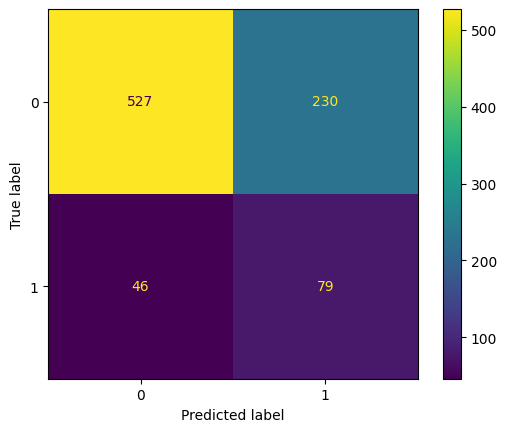

In [321]:
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

# Matriz de confusion
cm_test= confusion_matrix(y_test, y_pred)
# Visualización de la matriz de confusion
cm_test_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = le.classes_)
cm_test_display.plot()
plt.show()

In [322]:
# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm_test.ravel()

# Calculo de metricas
precision=tp/(tp+fp)
recall=tp/(tp+fn)
especificidad=tn/(fp+tn)
print(f'Precision: {precision}')
print(f'Recuperacion: {recall}')
print(f'F1-score: {(2*precision*recall)/(precision+recall)}')
print(f'Especificidad: {especificidad}')

Precision: 0.255663430420712
Recuperacion: 0.632
F1-score: 0.3640552995391705
Especificidad: 0.6961690885072656


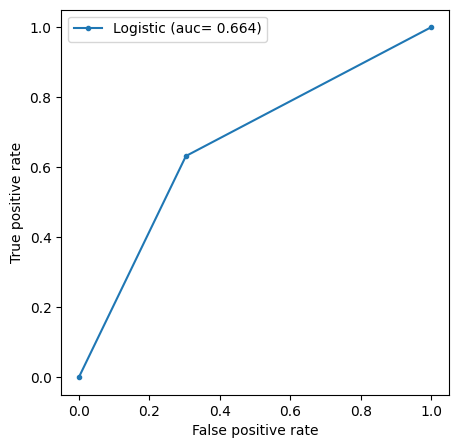

In [323]:
#Hacemos una curva RoC y calculamos el area bajo la curva (AUC)
FP_r, TP_r, threshold=roc_curve(y_test, y_pred)
auc=auc(FP_r, TP_r)
plt.figure(figsize=(5,5))
plt.plot(FP_r, TP_r,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

**Modelo de regresión logistica con Lasso**

In [324]:
X_var_train = np.load('/content/drive/MyDrive/analitica3/base_datos/X_var_train.npy')
X_var_test = np.load('/content/drive/MyDrive/analitica3/base_datos/X_var_test.npy')

Accuracy (Train): 68.34%
Accuracy (Test): 65.99%


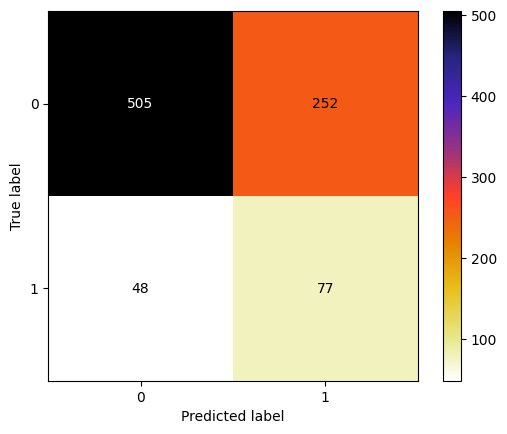

Confusion Matrix:
[[505 252]
 [ 48  77]]


In [325]:
# Crea el modelo de regresión logística con regularización L2
regr2 = LogisticRegression(random_state=6, penalty='l2', class_weight='balanced')  # L2 es Ridge

# Calibra el modelo en los datos seleccionados por Lasso
regr2.fit(X_var_train, y_train)

# Realiza predicciones sobre el conjunto de entrenamiento
y_pred_train = regr2.predict(X_var_train)

# Exactitud del modelo en el conjunto de entrenamiento
accuracy_train = regr2.score(X_var_train, y_train)
print("Accuracy (Train): {:.2f}%".format(accuracy_train * 100))

# Realiza predicciones sobre el conjunto de prueba
y_pred_test2 = regr2.predict(X_var_test)

# Exactitud del modelo en el conjunto de prueba
accuracy_test = regr2.score(X_var_test, y_test)
print("Accuracy (Test): {:.2f}%".format(accuracy_test * 100))

# Matriz de confusión en el conjunto de prueba
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix2 = confusion_matrix(y_test, y_pred_test2, labels=regr2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix2, display_labels=le.classes_)
disp.plot(cmap='CMRmap_r')
plt.show()
print("Confusion Matrix:")
print(conf_matrix2)

In [326]:
tn, fp, fn, tp = conf_matrix2.ravel()

# Calculo de metricas
precision=tp/(tp+fp)
recall=tp/(tp+fn)
especificidad=tn/(fp+tn)
print(f'Precision: {precision}')
print(f'Recuperacion: {recall}')
print("F1-score: ", {(2*precision*recall)/(precision+recall)})
print(f'Especificidad: {especificidad}')

Precision: 0.23404255319148937
Recuperacion: 0.616
F1-score:  {0.3392070484581498}
Especificidad: 0.667107001321004


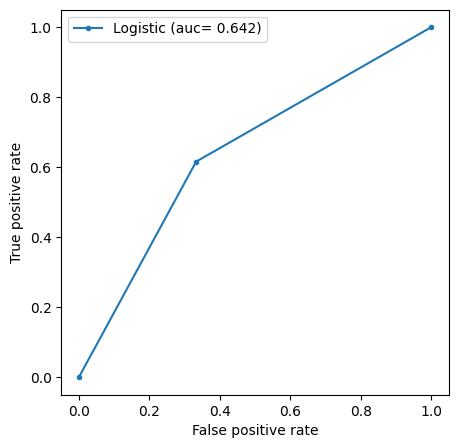

In [327]:
from sklearn.metrics import roc_curve, auc
FP_r, TP_r, threshold=roc_curve(y_test, y_pred_test2)
auc=auc(FP_r, TP_r)
plt.figure(figsize=(5,5))
plt.plot(FP_r, TP_r,marker='.',label='Logistic (auc= %0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

**Random Forest Classifier**

In [335]:
v_ranfor=RandomForestClassifier()
v_ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [336]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, clf.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print ("Test - classification report :\n", metrics.classification_report(y_test, clf.predict(X_test)))

Train - Accuracy : 0.8698979591836735
Train - classification report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      3003
           1       0.66      0.26      0.37       525

    accuracy                           0.87      3528
   macro avg       0.77      0.62      0.65      3528
weighted avg       0.85      0.87      0.84      3528

Test - Accuracy : 0.854875283446712
Test - classification report :
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       757
           1       0.47      0.18      0.26       125

    accuracy                           0.85       882
   macro avg       0.67      0.57      0.59       882
weighted avg       0.82      0.85      0.83       882



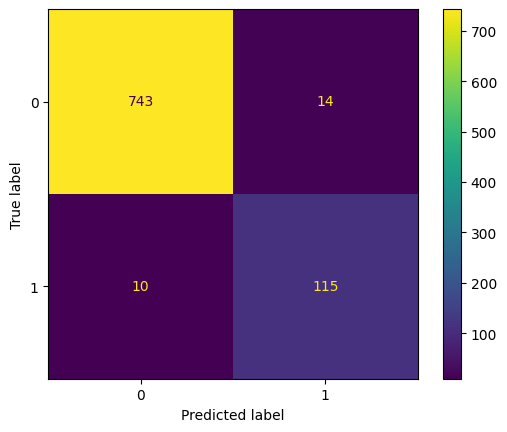

In [337]:

#Matriz de confusión
cm1=confusion_matrix(y_test,v_ranfor.predict(X_test))
# Visualización de la matriz de confusión
cm1_display=ConfusionMatrixDisplay(confusion_matrix=cm1)
cm1_display.plot()
plt.show()

In [339]:
parameters = [{
    'n_estimators':[50,100],
    'max_depth':[6,8,10,12],
    'max_features':[0.1,0.5,0.9],
    'criterion':['gini', 'entropy'],
    'class_weight':['balanced', None]
}]

#Definición del modelo
ranfor=RandomForestClassifier(random_state=42)

grid_search=GridSearchCV(ranfor, parameters, cv=5, scoring='accuracy',n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
bp=grid_result.best_params_

print('Best parameters: ', grid_result.best_params_)
print('Best score: ',grid_result.best_score_)

Best parameters:  {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 12, 'max_features': 0.1, 'n_estimators': 100}
Best score:  0.9671187189841882


**Definición de hiperparámetros**

In [340]:
#Creacion modelo RandomForestClassifier
v_ranfor=RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        max_depth=30,
        random_state=42,
        max_features=0.5
)
v_ranfor.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features=0.5,
                       random_state=42)

In [341]:
#Metricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, v_ranfor.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, v_ranfor.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, v_ranfor.predict(X_test)))
print ("Test - classification report :\n", metrics.classification_report(y_test, v_ranfor.predict(X_test)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3003
           1       1.00      1.00      1.00       525

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9727891156462585
Test - classification report :
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       757
           1       0.89      0.92      0.91       125

    accuracy                           0.97       882
   macro avg       0.94      0.95      0.94       882
weighted avg       0.97      0.97      0.97       882



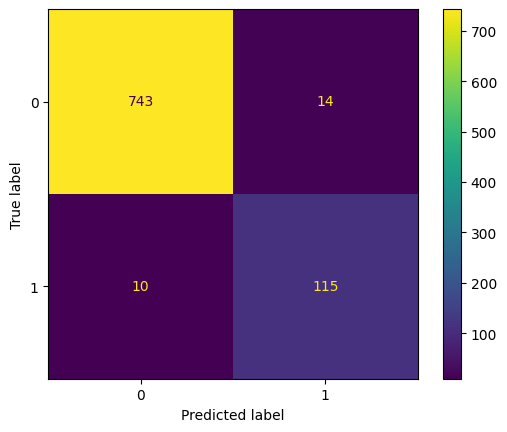

In [343]:
#Matriz de confusión
cm2=confusion_matrix(y_test,v_ranfor.predict(X_test))
# Visualización de la matriz de confusión
cm2_display=ConfusionMatrixDisplay(confusion_matrix=cm2)
cm2_display.plot()
plt.show()